In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
!pip install wordcloud
from wordcloud import WordCloud
!pip install textblob
from textblob import TextBlob
!pip install textstat
import textstat

/Users/nilaymenon/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nilaymenon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nilaymenon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('fake reviews dataset.csv')

In [4]:
df.rename(columns = {'text_':'review'}, inplace = True)
df

,category,rating,label,review
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [5]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [6]:
df['rating'].unique()

array([5., 1., 3., 2., 4.])

In [7]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [8]:
group_rating = df.groupby('label')['rating'].mean()
group_rating

label
CG    4.259893
OR    4.253265
Name: rating, dtype: float64

In [24]:
df['len_review'] = df['review'].apply(lambda x: len(x.split()))
df
review_len_per_group = df.groupby('label')['len_review'].mean()
review_len_per_group

label
CG    61.288237
OR    73.642610
Name: len_review, dtype: float64

In [10]:
df['review'] = df['review'].apply(lambda x: x.lower())
df['review_no_punc'] = df['review'].apply(lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))
df['review_no_stop'] = df['review'].apply(lambda s: ' '.join([token for token in word_tokenize(s.lower()) if token not in stopwords]))

In [25]:
df

,category,rating,label,review,len_review,review_no_punc,review_no_stop,sentiment,readability
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...",12,love this well made sturdy and very comfortab...,"love ! well made , sturdy , comfortable . love...",Positive,2.1
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...",16,love it a great upgrade from the original ive...,"love , great upgrade original . 've mine coupl...",Positive,2.9
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,14,this pillow saved my back i love the look and ...,pillow saved back . love look feel pillow .,Positive,0.1
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...",17,missing information on how to use it but it is...,"missing information use , great product price !",Positive,6.4
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,18,very nice set good quality we have had the set...,nice set . good quality . set two months,Positive,0.9
...,...,...,...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,i had read some reviews saying that this bra r...,329,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,Positive,5.6
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,i wasn't sure exactly what it would be. it is ...,270,i wasnt sure exactly what it would be it is a ...,n't sure exactly would . little large small si...,Positive,2.0
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"you can wear the hood by itself, wear it with ...",343,you can wear the hood by itself wear it with t...,"wear hood , wear hood , wear jacket without ho...",Positive,5.6
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,i liked nothing about this dress. the only rea...,278,i liked nothing about this dress the only reas...,liked nothing dress . reason gave 4 stars orde...,Positive,2.2


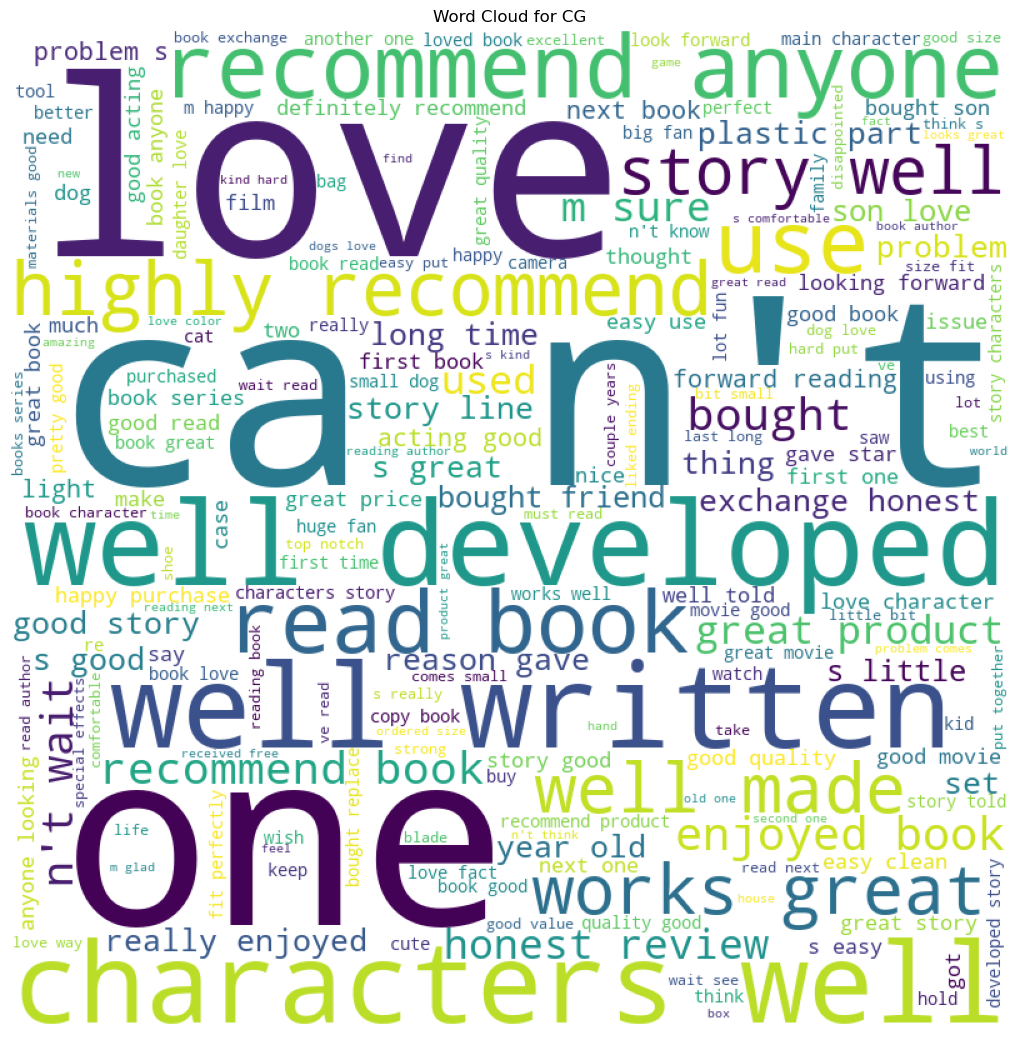

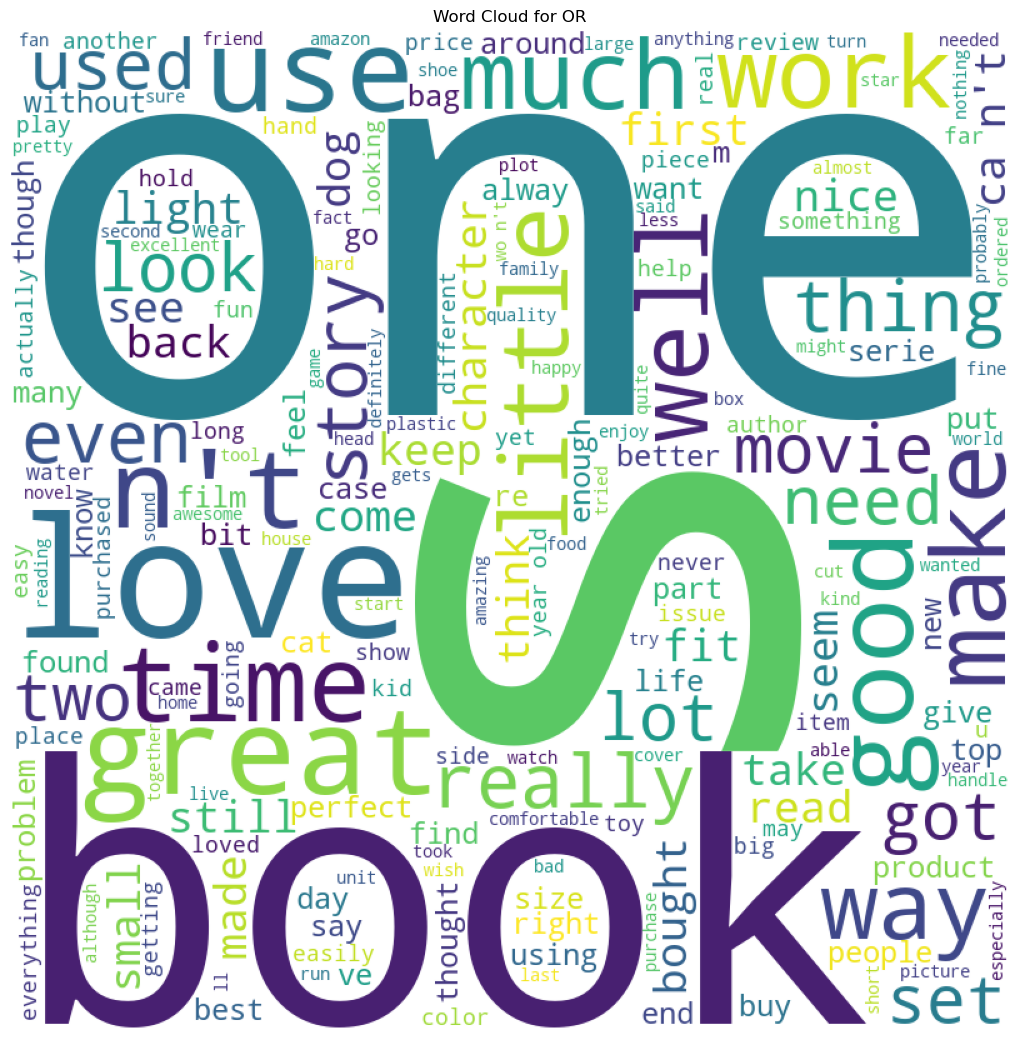

In [12]:
df_cg = df[df['label'] == 'CG']
df_or = df[df['label'] == 'OR']


text_cg = ' '.join(df_cg['review_no_stop'])
text_or = ' '.join(df_or['review_no_stop'])

wordcloud_cg = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text_cg)

wordcloud_or = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text_or)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_cg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for CG')
plt.show()

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud_or) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for OR')
plt.show()


In [13]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['sentiment'] = df['review'].apply(get_sentiment)

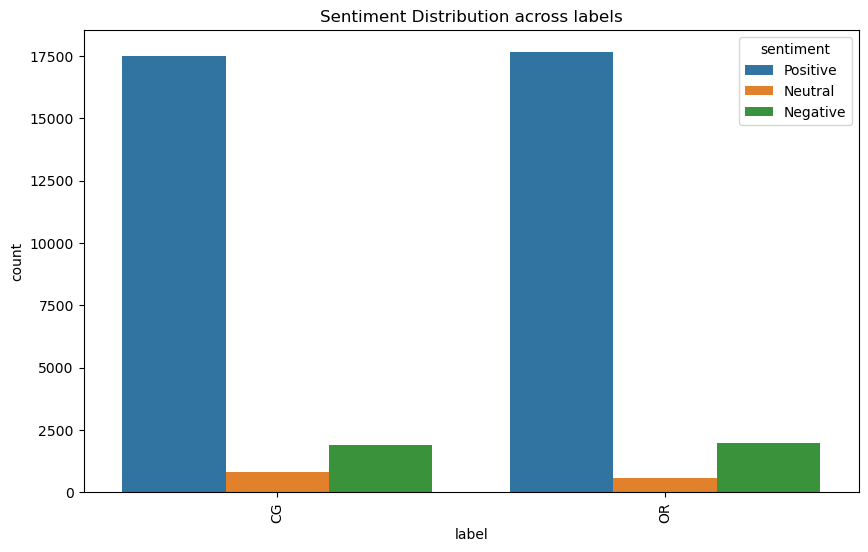

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='sentiment', data=df)
plt.title('Sentiment Distribution across labels')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Function to compute Flesch-Kincaid Grade Level
def compute_readability(review):
    return textstat.flesch_kincaid_grade(review)

# Apply the function to the 'review' column
df['readability'] = df['review'].apply(compute_readability)


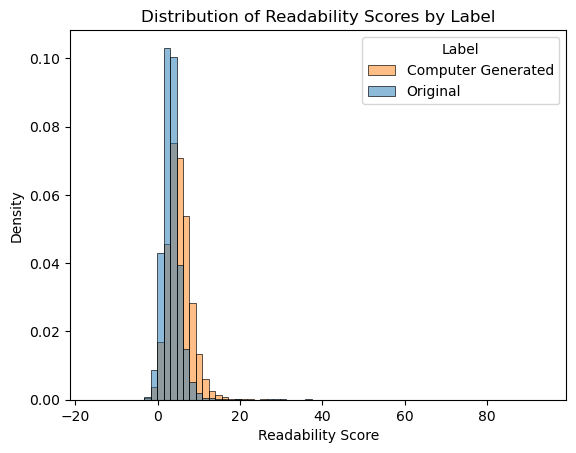

In [48]:
# Flesch-Kincaid Grade Level:
# 0-5: Very easy to read. Easily understood by an average 5th grader or younger.
# 6-8: Easy to read. Conversational English for consumers.
# 9-12: Fairly difficult to read. Plain English that is easily understood by an average 13 to 15-year-old student.
# 13-16: Difficult to read. Best understood by university graduates.
# 17+: Very difficult to read. Best understood by university graduates and above.

# plot shows distrbution of readiability scores based on wheter a lable is computer generated or human generated
sns.histplot(df, x = 'readability', hue = 'label', bins = 70, element = 'bars', stat ='density')
plt.title('Distribution of Readability Scores by Label')
plt.xlabel('Readability Score')
plt.ylabel('Density')
plt.legend(title = 'Label', labels = ['Computer Generated', 'Original'])
plt.show()

In [36]:
## bag of words model 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review_no_punc'])

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8606405341906764


In [53]:
clf.predict(X[3])

array(['CG'], dtype='<U2')

In [28]:
X[3]

<1x41099 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [35]:
# TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['review_no_punc'])

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8712748856188945
